# 센서자동화 짜기...

1) 우선 하나의 파일 작업을 만든다
2) 그걸로 클래스화 하고..
3) 폴더내에 넣으면 알아서 전처리한거 output 되게
4) 그래프는 파이썬으로 처리

# import

In [15]:
import pandas as pd
import os
import datetime

In [ ]:
# # 폴더내 파일 이름 리스트 가져오기 (이거 한다음에 인덱싱해서 불러오면 되겠다)
# import os
# file_list = os.listdir('경로')
# file_lsit

In [56]:
df = pd.read_csv("파일명.csv", encoding="cp949")
# 행열 삭제
df.drop([0,1,2,3], axis=0, inplace=True)
df.drop(df.columns[[2,4,6,8,10,12,13,14,15,16]], axis=1, inplace=True)
df['날짜']=pd.to_datetime(df["z6-20054"], format='%Y-%m-%d %H:%M:%S')
df['년']=df['날짜'].dt.year
df['월']=df['날짜'].dt.month
df['일']=df['날짜'].dt.day
# df['시']=df['날짜'].dt.hour
# df['분']=df['날짜'].dt.minute
# df['초']=df['날짜'].dt.second


df.drop(df.columns[[0]], axis=1, inplace=True)
df=df[['년', '월', '일','Port1', 'Port2', 'Port3', 'Port4', 'Port5', 'Port6']]
# df=df[['년', '월', '일', '시', '분', '초', 'Port1', 'Port2', 'Port3', 'Port4', 'Port5', 'Port6']]
df

,년,월,일,Port1,Port2,Port3,Port4,Port5,Port6
4,2023,2,27,-0.2,-0.1,-0.1,-15.2,-15.6,-14.5
5,2023,2,27,-0.2,-0.1,-0.1,-15.2,-15.6,-14.5
6,2023,2,27,-0.2,-0.1,-0.1,-15.1,-15.6,-14.5
7,2023,2,27,-0.2,-0.1,-0.1,-15.1,-15.5,-14.5
8,2023,2,27,-0.2,-0.1,-0.1,-15.1,-15.5,-14.5
...,...,...,...,...,...,...,...,...,...
4104,2023,3,28,-13.5,-19.4,-20.2,-6616,-98.9,-68.1
4105,2023,3,28,-13.5,-19.4,-20.3,-6247.3,-98.9,-68.4
4106,2023,3,29,-13.5,-19.4,-20.3,-6084.1,-98.7,-68.8
4107,2023,3,29,-13.5,-19.3,-20.3,-5822.3,-98.9,-69.3


In [57]:
df.dtypes

년         int64
월         int64
일         int64
Port1    object
Port2    object
Port3    object
Port4    object
Port5    object
Port6    object
dtype: object

In [63]:
df=df.astype({'Port1':'float','Port2':'float','Port3':'float','Port4':'float','Port5':'float','Port6':'float' })

In [73]:
df.groupby(['년','월', '일']).mean()

Port1      Port2      Port3         Port4        Port5  \
년    월 일                                                                
2023 2 27  -0.200000  -0.100000  -0.100000    -15.134286   -15.471429   
       28  -0.200000  -0.100000  -0.100000    -15.486806   -16.049306   
     3 1   -0.200000  -0.100000  -0.100000    -14.986806   -16.297222   
       2   -0.200000  -0.100000  -0.100000    -16.072917   -17.536111   
       3   -0.200000  -0.100000  -0.193056    -17.050000   -19.238194   
       4   -0.201389  -0.100000  -0.666667    -16.822222   -20.502778   
       5   -0.212500  -0.100000  -0.566667  -1040.161111   -23.278472   
       6   -0.229861  -0.132639  -0.377778 -19999.605556   -28.240278   
       7   -0.298611  -0.384722  -1.379861 -28401.107639   -36.474306   
       8   -0.300000  -0.867568  -2.448649 -43107.029730   -43.921622   
       9   -0.363636  -8.748252  -5.936364 -20139.617483   -80.915385   
       10  -0.461806 -10.693056  -7.206250 -19610.927083  -181.911806   
       11  -0.678472 -11.484722  -8.915278 -23768.526389  -675.559028   
       12  -1.137500 -12.556250 -10.402778  -8762.172222 -2662.667361   
       13  -3.170833 -13.883333 -11.555556   -132.182639  -507.159028   
       14  -5.461538 -14.718182 -11.895105   -845.334965  -222.395105   
       15  -6.329167 -15.265972 -12.086111  -2988.845833  -167.579861   
       16  -7.020833 -15.668056 -12.319444  -5822.822222  -154.950694   
       17  -8.193750 -16.344444 -13.011111  -6308.355556  -146.529861   
       18  -9.528472 -17.043056 -13.876389  -6877.369444  -159.913889   
       19 -10.337500 -17.483333 -14.717361  -6701.979167  -171.613194   
       20 -10.904167 -17.925000 -15.663889  -7382.216667  -200.511111   
       21 -11.550694 -18.531944 -17.042361  -8461.599306  -325.384028   
       22 -12.156250 -19.267361 -18.855556  -8171.722222 -1436.207639   
       23 -12.329167 -19.753472 -19.517361   -554.806944 -5969.834722   
       24 -11.850000 -18.936111 -17.471528    -25.943056  -219.757639   
       25 -11.646528 -18.394444 -17.222222    -74.788194  -151.460417   
       26 -12.080556 -18.563889 -18.420139   -580.315278  -137.154861   
       27 -12.950000 -19.081250 -19.726389  -2893.652083  -120.402778   
       28 -13.490278 -19.234028 -20.157639  -4270.604167  -102.179167   
       29 -13.500000 -19.333333 -20.300000  -5831.633333   -98.833333   

               Port6  
년    월 일              
2023 2 27 -14.440000  
       28 -14.354861  
     3 1  -13.772917  
       2  -13.400000  
       3  -13.444444  
       4  -13.300694  
       5  -15.045833  
       6  -27.561806  
       7  -32.150000  
       8  -35.989189  
       9  -34.576923  
       10 -36.938889  
       11 -40.311806  
       12 -47.707639  
       13 -38.552778  
       14 -35.545455  
       15 -34.655556  
       16 -38.282639  
       17 -45.410417  
       18 -46.500694  
       19 -47.984028  
       20 -50.508333  
       21 -54.401389  
       22 -60.427778  
       23 -38.836806  
       24 -16.343056  
       25 -28.445139  
       26 -40.350000  
       27 -53.021528  
       28 -64.065278  
       29 -69.233333

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
sns.set_context("talk")
sns.set_palette("Set2")
sns.set_style("white")

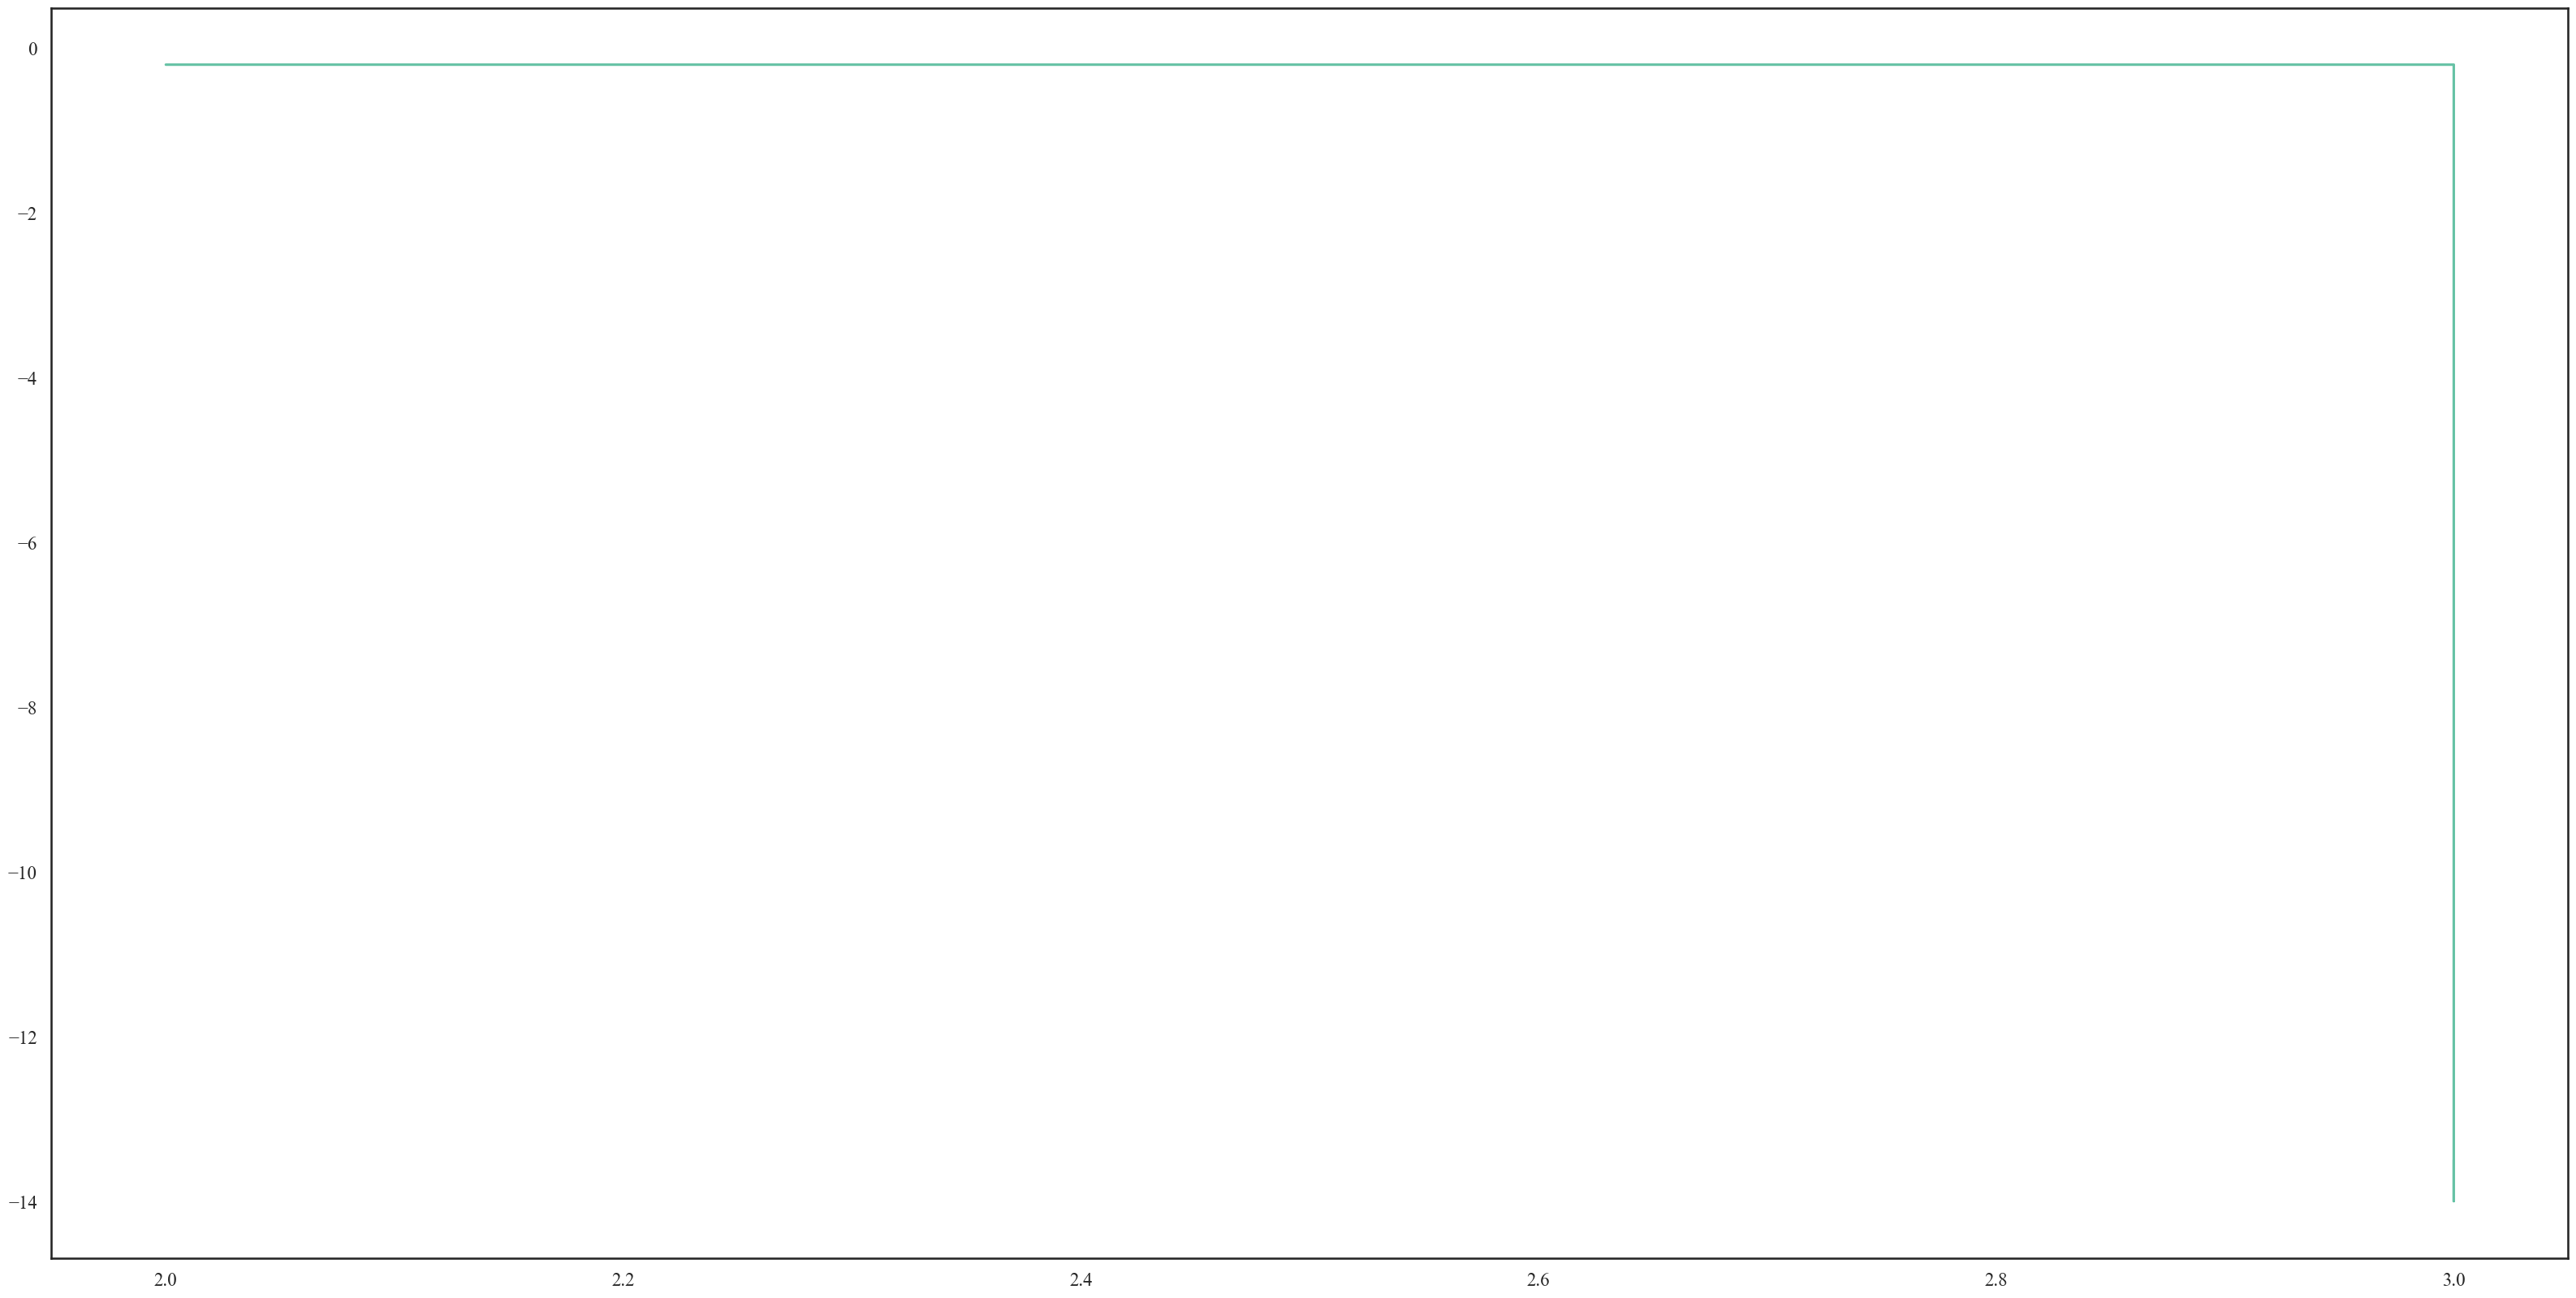

In [87]:
import matplotlib.font_manager as fm
import numpy as np

plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(1,1, figsize=(40,20))

plt.plot(df['월'], df['Port1'])
# plt.set_yticks(np.arange(0, -10000, -500))
# plt.set_ylabel("강수량(mm)", fontsize=24, labelpad=24, weight='bold')

In [83]:
import numpy as np